In [1]:
#  Import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("https://drive.google.com/uc?id=1rPR-P45M2UWsbXc8vpyCzWcQAYUfgVJX")
df.head()



<ipython-input-1-c2314ce0fd08>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("https://drive.google.com/uc?id=1rPR-P45M2UWsbXc8vpyCzWcQAYUfgVJX")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0



Now, let's find out the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.

In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

The dataset consists of 45466 rows and 24 columns. A lot of features exhibit missing (or null) values in the dataset.

Our aim is to build three simple recommender systems which recommends:
1. Top 20 movies having highest popularity.
2. Top 20 movies having highest average weighted rating.
3. Top 20 movies of a genre having highest rating.

As our dataset contains a lot of features that are not useful in building the above recommenders, let us create a subset of this dataset that consists of important features like:
`genres`, `id`, `popularity`, `title`, `vote_average`, `vote_counts`




In [3]:
# Create a DataFrame with only required features.
subset_df=df[['genres','id','popularity','title','vote_average','vote_count']]
subset_df.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.946943,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.015539,Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,11.7129,Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,3.859495,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,8.387519,Father of the Bride Part II,5.7,173.0


Let us now proceed with data cleaning and data preparation for subset DataFrame.




---



Data Cleaning





In [4]:
#Identify and display the duplicate entries in the dataset
subset_df[subset_df.duplicated('id',keep=False)].sort_values(by='id')

,genres,id,popularity,title,vote_average,vote_count
676,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,0.122178,The Promise,5.0,1.0
1465,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,0.122178,The Promise,5.0,1.0
44821,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,6.480376,Pokémon: Spell of the Unknown,6.0,144.0
4114,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,10.264597,Pokémon: Spell of the Unknown,6.0,143.0
5710,"[{'id': 18, 'name': 'Drama'}]",109962,12.180836,Rich and Famous,4.9,7.0
20899,"[{'id': 18, 'name': 'Drama'}]",109962,10.396878,Rich and Famous,4.9,7.0
23534,"[{'id': 18, 'name': 'Drama'}]",110428,0.110065,Camille Claudel 1915,7.0,20.0
4356,"[{'id': 18, 'name': 'Drama'}]",110428,0.134014,Camille Claudel 1915,7.0,20.0
24844,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,6.880365,Deal,5.2,22.0
14012,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,6.880365,Deal,5.2,22.0


In [5]:
# Remove and verify the duplicate movie entries
subset_df=subset_df.drop_duplicates(subset='id')
subset_df[subset_df.duplicated('id',keep=False)].sort_values(by='id')


,genres,id,popularity,title,vote_average,vote_count


Thus, the duplicate values have been removed from the DataFrame. Let us check the total number of rows, columns and data types of columns.

In [6]:
#  Get the total number of rows and columns and data types of columns.
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45436 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45436 non-null  object 
 1   id            45436 non-null  object 
 2   popularity    45431 non-null  object 
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


You may observe that some of the features contain null values in the dataset. Let us see how many null values are present in each of the features.

In [7]:
#  Find the sum of missing values in the dataset.
subset_df.isnull().sum()

genres          0
id              0
popularity      5
title           6
vote_average    6
vote_count      6
dtype: int64

As there are not many null values, let us simply drop these null values from the dataset.

In [8]:
#  Drop null values from the subset DataFrame
subset_df.dropna(inplace=True)
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45430 non-null  object 
 1   id            45430 non-null  object 
 2   popularity    45430 non-null  object 
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


Now our dataset does not contain any null values. However, the data type of `id` and `popularity` column must be `int` and `float` respectively. Let us convert the data type of these columns using `astype()` function.



In [9]:
# Perform data type conversion.

# Convert the type of 'id' column to 'int' type.
subset_df['id']=subset_df['id'].astype('int')
subset_df['popularity']=subset_df['popularity'].astype('float')
subset_df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45430 non-null  object 
 1   id            45430 non-null  int64  
 2   popularity    45430 non-null  float64
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.4+ MB


Hence, the data type of `id` and `popularity` column is now changed. Let us once again print the first 5 rows of the subset DataFrame.

In [10]:
# Print first 5 rows of DataFrame.
subset_df.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.946943,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.015539,Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,11.712900,Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,3.859495,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,8.387519,Father of the Bride Part II,5.7,173.0


Here, you can see that the `genres` feature is a list of dictionaries. Print the first  row of the `genres` column to have a closer look at its value.

In [11]:
# Print the first row of 'genres' column.
subset_df['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [14]:
first_row=subset_df['genres'][0]
print(type(first_row))
first_row

<class 'str'>


"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [15]:
from ast import literal_eval
first_row_unstring=literal_eval(first_row)
print(type(first_row_unstring))
first_row_unstring

<class 'list'>


[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

---

In [16]:
#  Use lambda function and 'literal_eval()' to obtain a list of genres.
subset_df['genres']=subset_df['genres'].apply(lambda x: [i['name'] for i in literal_eval(x)])
subset_df.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[Animation, Comedy, Family]",862,21.946943,Toy Story,7.7,5415.0
1,"[Adventure, Fantasy, Family]",8844,17.015539,Jumanji,6.9,2413.0
2,"[Romance, Comedy]",15602,11.712900,Grumpier Old Men,6.5,92.0
3,"[Comedy, Drama, Romance]",31357,3.859495,Waiting to Exhale,6.1,34.0
4,[Comedy],11862,8.387519,Father of the Bride Part II,5.7,173.0


####  Exploding DataFrame

Let us first print 5 rows of `'genres'` column of the subset DataFrame.


In [17]:
#Print first 5 rows of 'genres' column.
subset_df['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

Here, you can see that the index is duplicated for the exploded rows. However, if we want to assign a new index number to every row of the DataFrame, just use `ignore_index = True` parameter. Let us see how it works.

In [18]:
#Explode 'genres' column and give new index to every row.
genres_df=subset_df.explode('genres',ignore_index=True)
genres_df.head()

,genres,id,popularity,title,vote_average,vote_count
0,Animation,862,21.946943,Toy Story,7.7,5415.0
1,Comedy,862,21.946943,Toy Story,7.7,5415.0
2,Family,862,21.946943,Toy Story,7.7,5415.0
3,Adventure,8844,17.015539,Jumanji,6.9,2413.0
4,Fantasy,8844,17.015539,Jumanji,6.9,2413.0


In [19]:
# Top 20 movies as per popularity of the movie
top_20_popular=subset_df.sort_values(by='popularity',ascending=False).head(20)
top_20_popular

,genres,id,popularity,title,vote_average,vote_count
30700,"[Family, Animation, Adventure, Comedy]",211672,547.488298,Minions,6.4,4729.0
33356,"[Action, Adventure, Fantasy]",297762,294.337037,Wonder Woman,7.2,5025.0
42222,"[Family, Fantasy, Romance]",321612,287.253654,Beauty and the Beast,6.8,5530.0
43644,"[Action, Crime]",339403,228.032744,Baby Driver,7.2,2083.0
24455,"[Adventure, Family, Animation, Action, Comedy]",177572,213.849907,Big Hero 6,7.8,6289.0
26564,"[Action, Adventure, Comedy]",293660,187.860492,Deadpool,7.4,11444.0
26566,"[Action, Adventure, Comedy, Science Fiction]",283995,185.330992,Guardians of the Galaxy Vol. 2,7.6,4858.0
14551,"[Action, Adventure, Fantasy, Science Fiction]",19995,185.070892,Avatar,7.2,12114.0
24351,"[Action, Thriller]",245891,183.870374,John Wick,7.0,5499.0
23675,"[Mystery, Thriller, Drama]",210577,154.801009,Gone Girl,7.9,6023.0


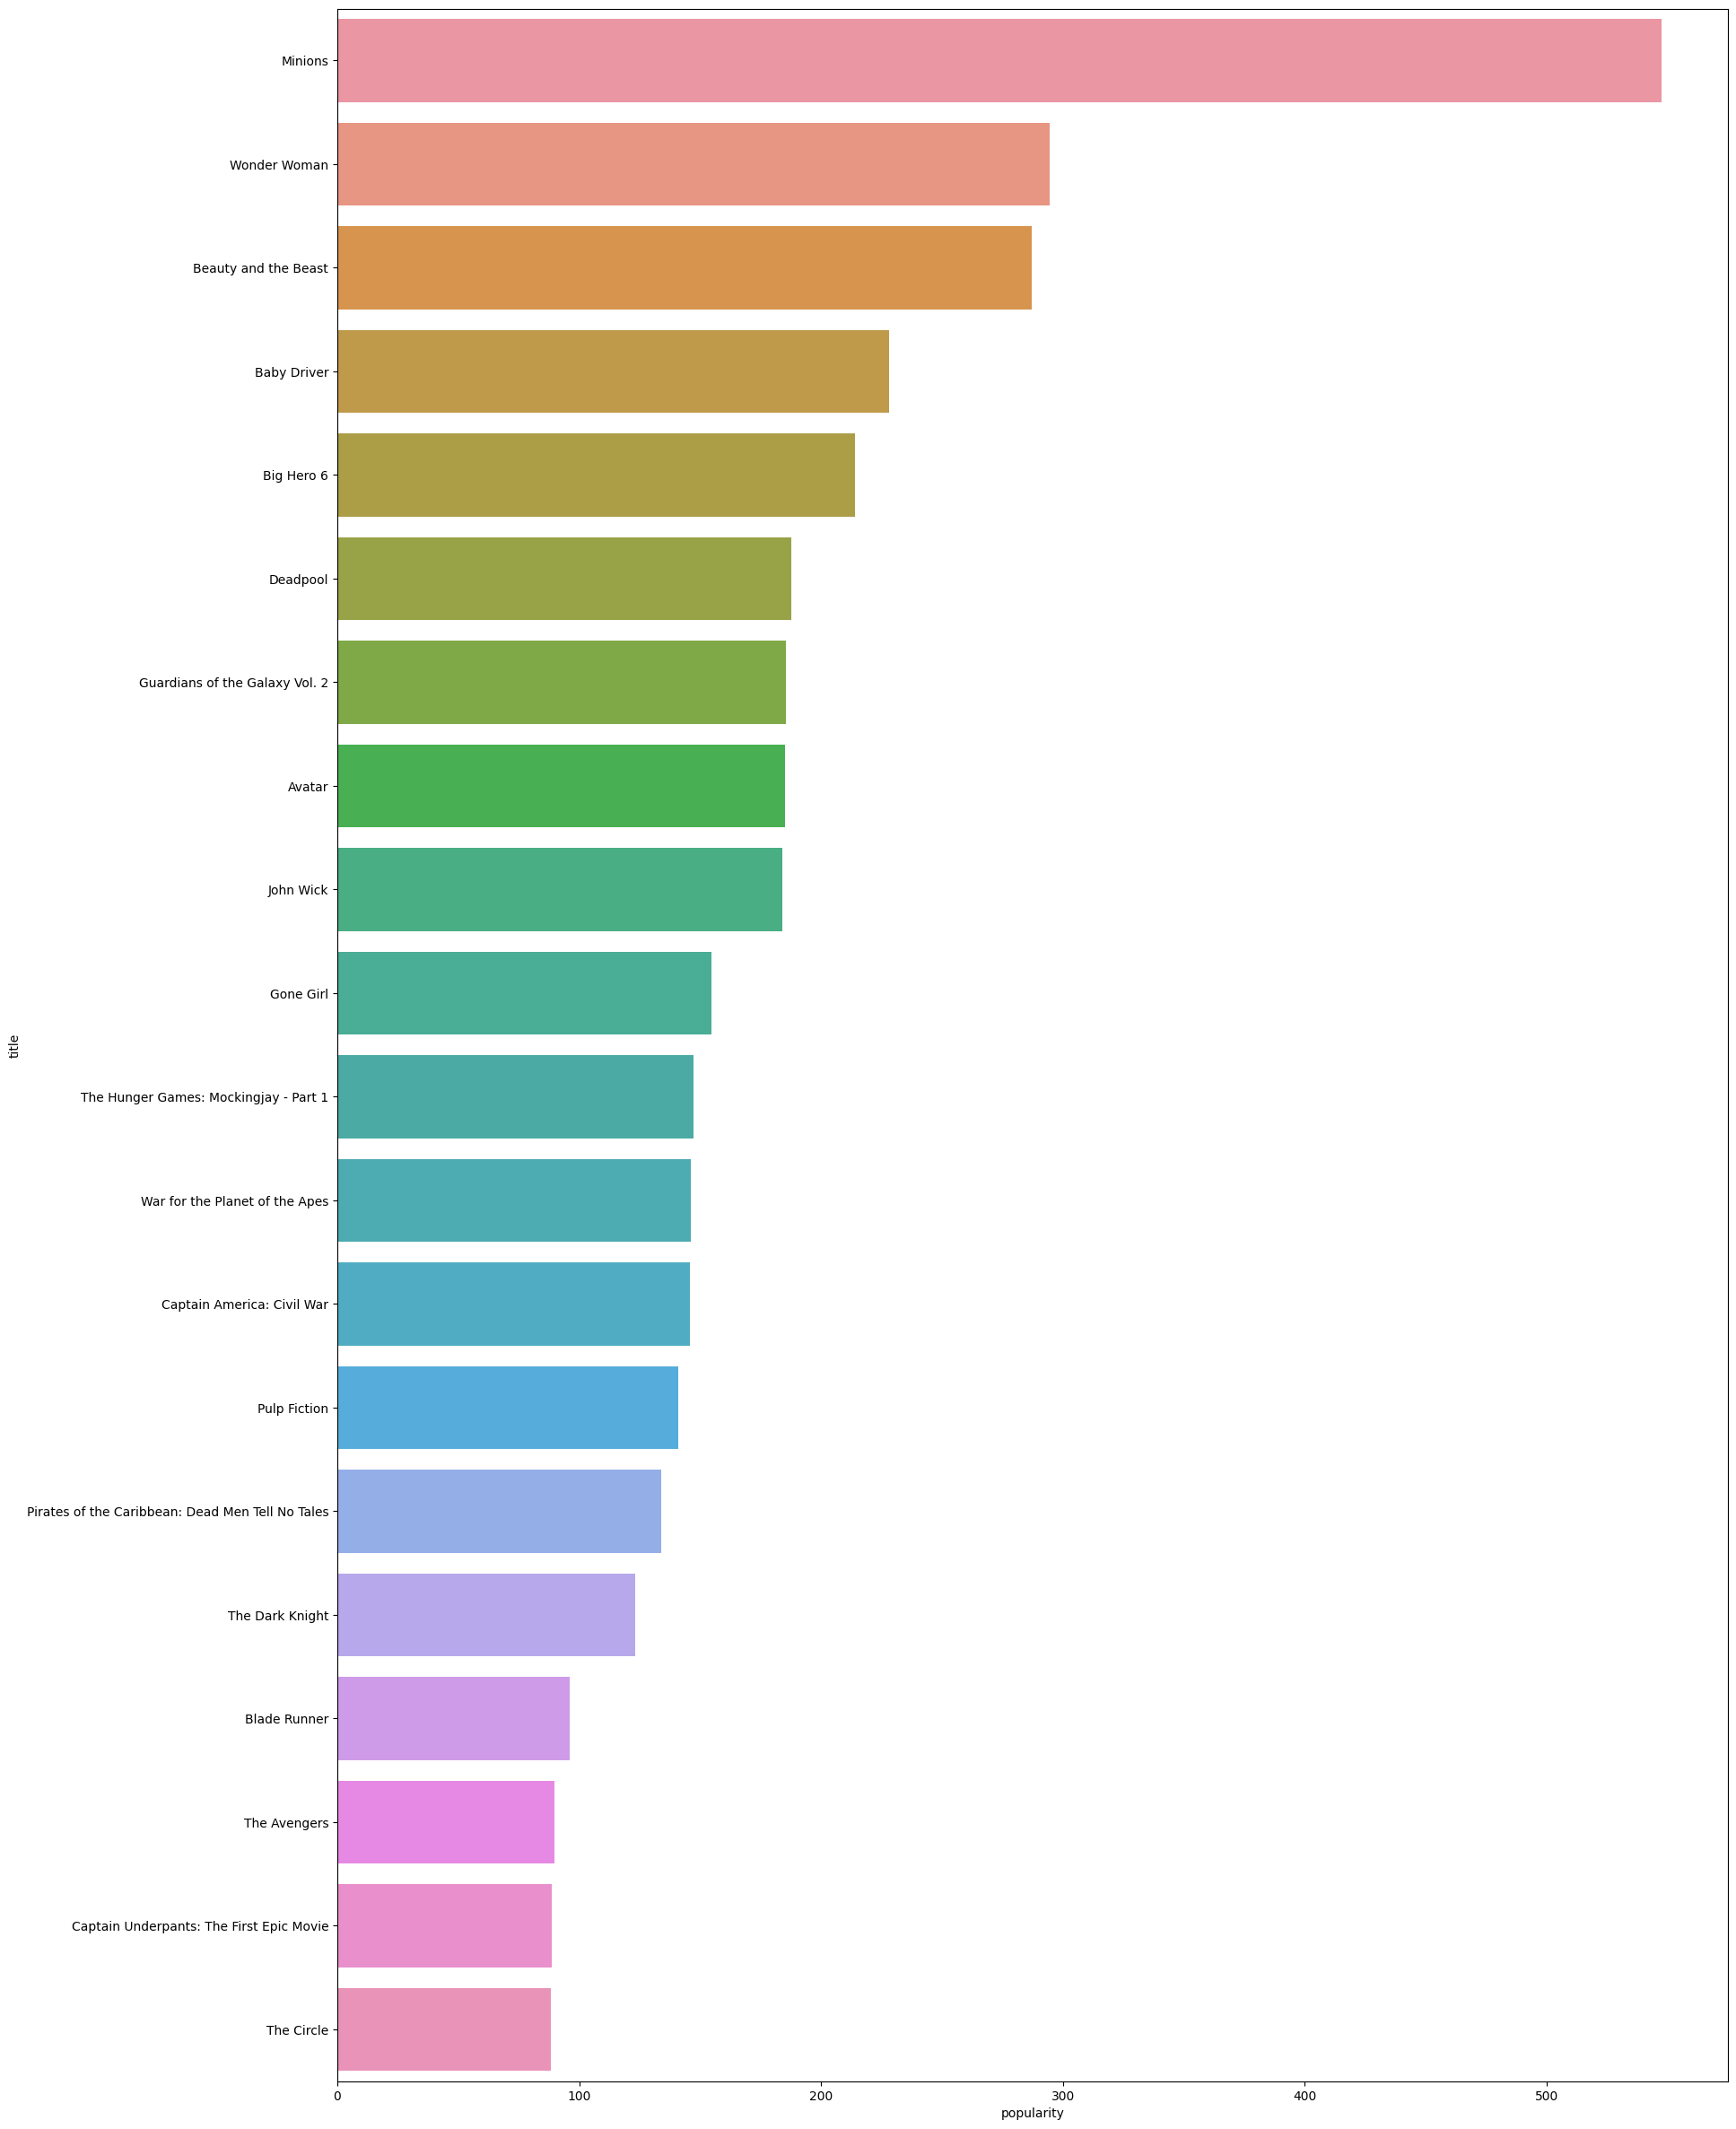

In [20]:
#Plot top 20 popular movies
plt.figure(figsize=(20,30))
sns.barplot(y='title',x='popularity',data=top_20_popular)
plt.show()

Hence, a new subscriber can be recommended with these popular movies. This was a recommender system based on popularity.


---